## **Importing The Dataset**

---

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For this data analysis and cleaning, the selected libraries are used:
- Pandas; provides a plethora of tools that are essential for data visualisation and cleaning. 
- NumPy; has many numerical analysis functions that can be used in tangent with Machine Learning Algorithms.
- Matplotlib; excells at data visualisation with the implementation of graphs that can be used to sum up vast amounts of data patterns.

In [129]:
data = pd.read_csv("weatherHistory.csv")
# Assigns the dataset to the variable data

In [130]:
data.dropna(subset=["Formatted Date"], inplace=True)
data.fillna(0, inplace=True)
print(data.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [131]:
print("Number of rows in unfiltered dataset:", len(data)) 
# Displays the amount of unfiltered rows there are without data cleaning.

Number of rows in filtered dataset: 96453


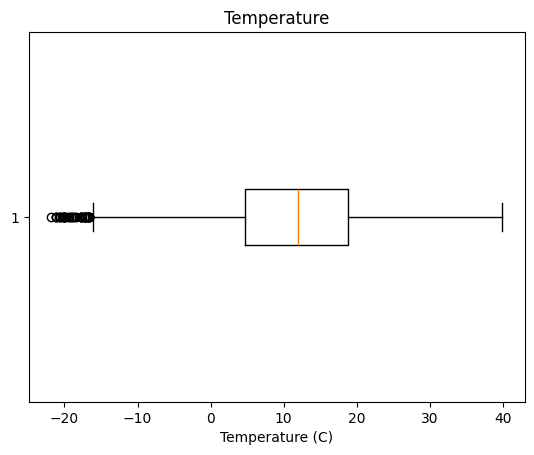

In [132]:
plt.boxplot(data["Temperature (C)"], vert=False)
# Creating a box plot
plt.xlabel("Temperature (C)")
plt.title("Temperature")
# Assigning excess details
plt.show()
# Makes a box plot to refer to the data. The Circles to the far left are called "Whiskers" and they are outliers that need removing.

In [134]:
dataQuantile = ["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"] 
# Selects the data that will be used

for idata in dataQuantile:
    Q1 = data[idata].quantile(0.30)
    Q3 = data[idata].quantile(0.60)
    # Calculate the lower and upper quantile ranges
    
    IQR = Q3 - Q1
    # Calculates the Interquantile range

    cutoff = 1.5 * IQR 
    lower, upper = Q1 - cutoff, Q3 + cutoff
    # Removes all potential outliers within the top and bottom 10% of the previously selected data

    data = data[(data[idata] >= lower) & (data[idata] <= upper)] 
    # Applies the newly acquired data to the data variable

In [135]:
print("Number of rows in filtered dataset:", len(data))
# Displays the amount of filtered rows there are without data cleaning.

Number of rows in filtered dataset: 38026


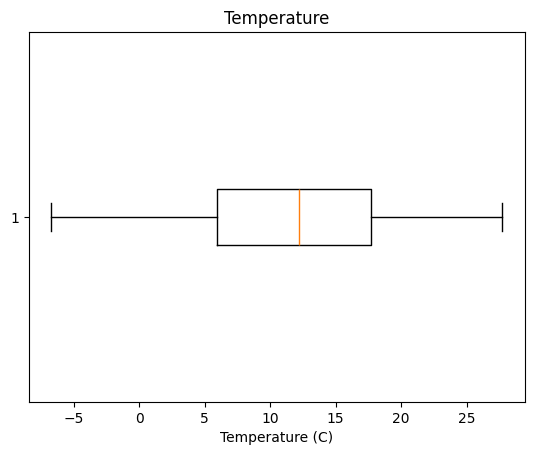

In [136]:
plt.boxplot(data["Temperature (C)"], vert=False)
# Creating a box plot
plt.xlabel("Temperature (C)")
plt.title("Temperature")
# Assigning excess details
plt.show()
# After removing the outliers, the box plot is displayed accordingly after data cleaning.